# 04. 메타휴리스틱

<br>

## 04.01. 메타휴리스틱 (Metaheuristic)

- **휴리스틱 (Heuristic) : 경험적으로 좋다고 알려져 있는 지식**
- **메타휴리스틱 : 특정한 문제에 한정되지 않는 유용한 휴리스틱을 제공하려는 프레임** 
    - 특정 문제에 관한 지식에 의존하지 않으므로, 사전에 주효과의 크기나 요소 사이의 교호 작용 유무 등에 관한 지식이 없더라도 휴리스틱을 제공할 수 있음

<br>

#### 마케팅 케이스
> **디자인 5개와 CTA 버튼 문구 5개의 조합 $\rightarrow 5\times 5 = 25$에 대한 테스트**

<br>



## 04.02. 언덕 오르기 알고리즘 (Hill Climbing)
- **솔루션 (Solution) : 어떠한 지점에 해당하는 것**
    - 예) **25개의 조함 $\rightarrow$ 25개의 솔루션**
    
- **솔루션 공간 (Solution Space) : 솔루션의 집합**
    - 예) **25개의 조합 $\rightarrow$ 크기가 25인 솔루션 공간**
    
- **실행 가능 솔루션 (Executable Solution) : 솔루션 공간에 포함되어 평갓값이 정의된 솔루션**

- **평갓값 : 솔루션을 어떤 지표 (평가함수)로 평가한 값**
    - 예) 각 디자인안의 클릭률
        
        **클릭률은 평가함수 / 각 디자인안의 클릭률은 평갓값**
        
    - **솔루션을 평가한다는 것은 웹 최적화의 컨텍스트에서 실제 솔루션을 사용자에게 보여주고 평갓값을 얻는 것을 의미**
    
<br>

- **탐색의 목적은 평갓값을 최대(최소)로 하는 최적 솔루션을 찾는 것**


<br>

### 언덕 오르기 알고리즘

1. **현재 솔루션 근방에 있는 값 (근방 솔루션)을 평가**
- **현재 솔루션은 잠정적으로 최선이라 생각되는 솔루션 (초기 솔루션)**
- 근방의 정의는 미리 정해져 있는 것이 아니라, 문제에 따라 최적 근방 솔루션의 정의를 고려

2. **만약 현재 솔루션보다 근방 솔루션의 평갓값이 높다면 현재 솔루션을 그 솔루션으로 업데이트**
- 근방 솔루션을 평가하고 그중 현재 솔루션보다 뛰어난 것이 있다면, 현재 솔루션을 업데이트 하는 과정을 반복

<br>




<br>

### 알고리즘 구현



<br>

#### 예시

- $x_1$, $x_2$ 2개 변수로 이루어진 2차원 솔루션 공간을 가정 $\rightarrow x = (x_1, x_2)$
    - 변수들은 각각 0, 1, 2, 3, 4라는 이산값을 가짐
    
- 평가함수 : $f(x) = 0.5 x_1 + x_2 -0.3 x_1 x_2$
    - 교호작용 포함

<br>

- **각 기둥은, $x_1$, $x_2$의 각 조합에 대한 평가함수의 값**
    
    $\rightarrow$ **평가함수의 교호작용에 의해 (0, 4)와 (4, 0)이라는 2개의 언덕이 있는 형태**
    
    $\rightarrow$ **평가함수를 기반으로 $x = (0, 4)$가 최적점이며, 이 떄의 평갓값은 $f(0, 4) = 4)**

In [25]:
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

C:\Users\FORYOUCOM\AppData\Local\Temp\ipykernel_600\2582661510.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


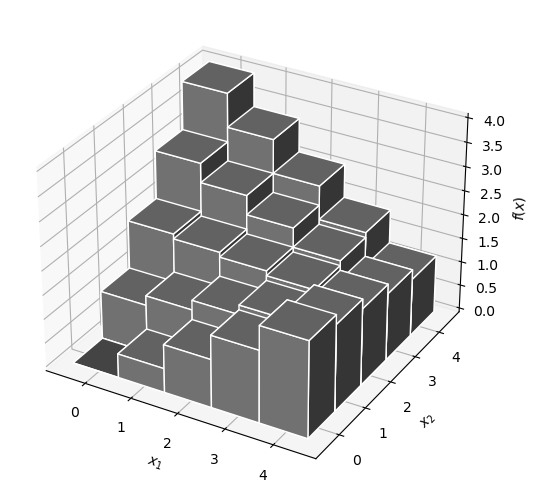

In [26]:
fig = plt.figure()
ax = Axes3D(fig)

size = 5
_x1, _x2 = np.meshgrid(np.arange(size), np.arange(size))
x1, x2 = _x1.ravel(), _x2.ravel()

f = lambda x1, x2: 0.5 * x1 + x2 - 0.3 * x1 * x2
ax.bar3d(x1, x2, 0, 1, 1, f(x1, x2), color='gray', edgecolor='white', shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.xticks(np.arange(0.5, size, 1), range(size))
plt.yticks(np.arange(0.5, size, 1), range(size))
plt.show() 

<br>

#### 평가함수에 대한 사전정보가 없는 경우

- `init_x` : 초깃값
- `init_f ` : 초기 솔루션의 평갓값

In [41]:
def is_valid(x):
  
    return all(-1 < i < size for i in list(x))

In [42]:
class HillClimbing:

    def __init__(self, init_x, init_f):
        self.current_x = init_x 
        self.current_f = init_f

    def get_neighbors(self):

        neighbor_xs = [] 
        for i, xi in enumerate(self.current_x):
            
            # 현재 솔루션에서 상하좌우의 솔루션을, 근방 솔루션으로 출력
            neighbor_x = list(self.current_x)
            neighbor_x[i] += 1 
            
            # 상하좌우 중 하나의 솔루션이 솔루션 공간에 포함되지 않으면, 포함되지 않음
            if is_valid(neighbor_x): 
                neighbor_xs.append(tuple(neighbor_x)) 

            neighbor_x = list(self.current_x)
            neighbor_x[i] -= 1

            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x))
        
        return neighbor_xs

    def update(self, neighbor_xs, neighbor_fs):
        
        # 근방 솔루션과 그 평갓값을 받아ㅣ, 그 중 현재 솔루션보다 하나라도 평갓값이 높은 솔루션이 있다면
        # 현재 솔루션의 값을 그 값으로 교체
        # 현재 솔루션보다 우수한 솔루션이 여럿 존재하는 경우, 평갓값이 가장 큰 솔루션으로 갱신
        old_x = self.current_x
        if max(neighbor_fs) > self.current_f:
          self.current_x = neighbor_xs[neighbor_fs.index(max(neighbor_fs))]
          self.current_f = max(neighbor_fs)
        
        return (old_x, self.current_x)

<br>

- 초기 솔루션을 $x = (0, 0)$으로 설정하고 탐색

In [48]:
init_x = (0, 0) # 초기 솔루션

f = lambda x1, x2: 0.5 * x1 + x2 - 0.3 * x1 * x2
init_f = f(init_x[0], init_x[1]) # 초기 평갓값

hc = HillClimbing(init_x, init_f)
evaluated_xs = {init_x}
steps = []

In [49]:
for _ in range(6):
    neighbor_xs = hc.get_neighbors()
    neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
    step = hc.update(neighbor_xs, neighbor_fs)

    print('%s -> %s' % (step))
    steps.append(step)
    evaluated_xs.update(neighbor_xs)

(0, 0) -> (0, 1)
(0, 1) -> (0, 2)
(0, 2) -> (0, 3)
(0, 3) -> (0, 4)
(0, 4) -> (0, 4)
(0, 4) -> (0, 4)


<br>

#### 솔루션 공간에서의 탐색경로
- 25개 솔루션 중 10개의 솔루션만 평가하여, 최적 솔루션을 발견

In [50]:
import matplotlib.ticker as ticker

In [51]:
def visualize_path(evaluated_xs, steps): 
    fig, ax = plt.subplots(figsize=(5, 5)) 
    ax.set_xlim(-.5, size -.5) 
    ax.set_ylim(-.5, size -.5)

    for i in range(size):
        for j in range(size):
            if (i, j) in evaluated_xs:
                ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center', bbox=dict(edgecolor='gray', facecolor='none', linewidth=2))
        else:
            ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center')
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.xaxis.set_minor_locator(ticker.FixedLocator(np.arange(-.5, size - .5, 1)))
    ax.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(-.5, size - .5, 1)))

    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    ax.grid(True, which='minor')
    ax.grid(False, which='major')

    for step in steps:
        ax.annotate('', xy=step[1], xytext=step[0], arrowprops=dict(shrink=0.2, width=2, lw=0))

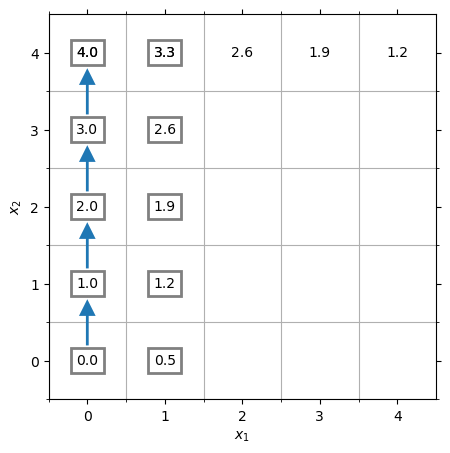

In [52]:
visualize_path(evaluated_xs, steps) 

<br>

### 전역 최적 솔루션 / 국소 최적 솔루션

- $x = (4, 2)$에서의 탐색 시작

In [54]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

In [55]:
for _ in range(6):
    neighbor_xs = hc.get_neighbors()
    neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
    step = hc.update(neighbor_xs, neighbor_fs)

    print('%s -> %s' % (step))
    steps.append(step)
    evaluated_xs.update(neighbor_xs)

(4, 2) -> (4, 1)
(4, 1) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)


- **솔루션 공간에서 $(0, 4)$가 최적의 솔루션이지만,**

    **초기 솔루션을 $x = (4, 2)$로 지정하였을 때, 최적의 솔루션을 탐색하지 못함**
    
    $\rightarrow$ **탐색을 통하여 도출된 $x=(4, 2)$는 국소 최적 솔루션**

    $\rightarrow$ **솔루션 공간 전체에 대하여 도출된 최적의 솔루션언 전역 최적 솔루션**

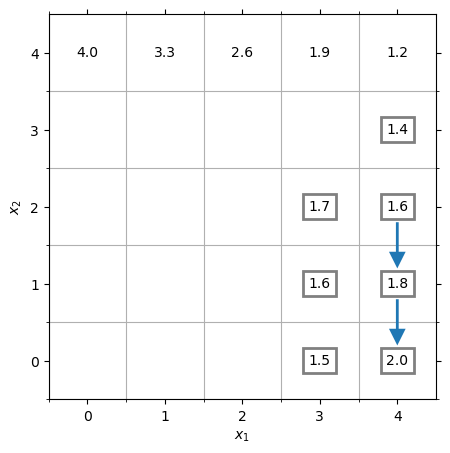

In [56]:
visualize_path(evaluated_xs, steps)

<br>

- **단순한 언덕 오르기 알고리즘은, 국소 최적 솔루션에 갇혀버리는 단점이 존재**
    - 이를 극복하기 위한 다양한 언덕 오르기 알고리즘이 존재
    
    $\rightarrow$ **하지만, 언덕 오르기 알고리즘 자체에는 국소 최적 솔루션에서 빠져나오는 구조는 존재하지 않음**
    
<br>

- **만약 평가 함수가 하나의 언덕만 가진 형태 (단봉성, Unimodality)인 경우, 언덕 오르기 알고리즘이 충분히 유용하지만,**

    **여러 언덕을 가진 형태 (다봉성, Multimodality)인 경우에는, 언덕 오르기 알고리즘은 국소 최적 솔루션에 갇혀버릴 가능성이 존재**
    
    $\rightarrow$ **문제의 특성에 따라 탐색 성능이 결정**
    
<br>

- **메타휴리스틱은 이러한 문제 특성에 의존하지 않는 전역 최적 솔루션을 찾아내는 것이 목표**

    $\rightarrow$ **즉, 평가함수가 다봉성을 가지고 있더라도 동작하며, 국소 최적 솔루션에서 벗어날 수 있도록 보완한 탐색 기법이 메타휴리스틱**

<br>

## 04.03. 확률적 언덕 오르기 알고리즘
- 단순 언덕 오르기 알고리즘은 모든 근방 솔루션을 평가하고, 그중에서 가장 평갓값이 높은 것을 검토
    
    이 알고리즘은 같은 조건이라면 몇 번을 실행해도 완전히 같은 동작을 하므로 **결정적 알고리즘 (Deterministic Algorithm)**
    
<br>

- **확률적 알고리즘 (Randomized Algorithm) : 모든 근방 솔루션을 평가하는 것이 아니라, 무작위로 선택된 하나의 근방 솔루션과의 평가를 반복하는 방법 $\rightarrow$ 무작위성이 알고리즘에 추가**



<br>

### 확률적 언덕 오르기 알고리즘
- 후보가 되는 근방 솔루션에서 무작위로 하나를 추출
- 모든 근방 솔루션을 평가하는 것이 아닌, 무작위로 선택된 근방 솔루션 하나만을 평가

In [66]:
import random

In [124]:
class RandomizedHillClimbing:


    def __init__(self, init_x, init_f): 
        self.current_x = init_x 
        self.current_f = init_f

    def get_neighbors(self): 

        neighbor_xs = []
        for i, xi in enumerate(self.current_x):
            neighbor_x = list(self.current_x)
            neighbor_x[i] += 1

            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x)) 
      
            neighbor_x = list(self.current_x)
            neighbor_x[i] -= 1
      
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x)) 
    
        return neighbor_xs

    def get_neighbor(self): 

        return random.choice(self.get_neighbors()) 
    
    def update(self, neighbor_x, neighbor_f):

        old_x = self.current_x
        if self.current_f < neighbor_f:
            self.current_x = neighbor_x
            self.current_f = neighbor_f 

        return (old_x, self.current_x)

<br>

- **국소 최적 솔루션에 갇히지 않고, 전역 최적 솔루션에 도달됨**
- **하지만, 확률적 언덕 오르기 알고리즘도, 일단 국소 최적 솔루션에 갇히면 벗어날 수 없기에, 다른 보완책이 필요**

In [150]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
rhc = RandomizedHillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

In [151]:
random.seed(0)
for _ in range(30):
    neighbor_x = rhc.get_neighbor()
    print(neighbor_x, end=' -> ')
    neighbor_f = f(neighbor_x[0], neighbor_x[1])
    step = rhc.update(neighbor_x, neighbor_f)

    steps.append(step)
    evaluated_xs.add(neighbor_x)

(4, 3) -> (4, 3) -> (3, 2) -> (3, 3) -> (3, 2) -> (3, 2) -> (3, 4) -> (2, 4) -> (1, 4) -> (1, 3) -> (2, 4) -> (1, 3) -> (2, 4) -> (0, 4) -> (1, 4) -> (1, 4) -> (0, 3) -> (1, 4) -> (0, 3) -> (1, 4) -> (1, 4) -> (0, 3) -> (0, 3) -> (1, 4) -> (0, 3) -> (0, 3) -> (0, 3) -> (1, 4) -> (0, 3) -> (0, 3) -> 

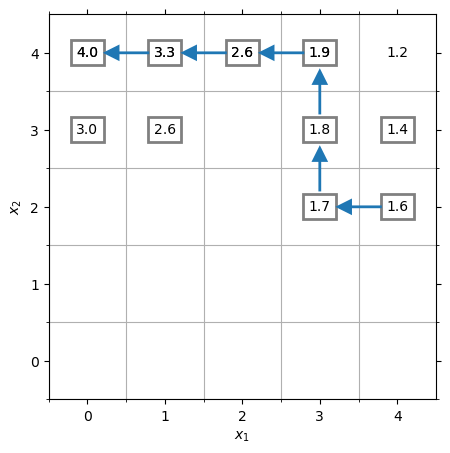

In [127]:
visualize_path(evaluated_xs, steps)

<br>

## 04.04. 시뮬레이티드 어닐링 (Simulated Anealing)

<br>

#### 시뮬레이티드 어닐링 (담금질 알고리즘)
- **근방 솔루션이 현재 솔루션 보다 좋다면, 언덕 오르기 알고리즘처럼 항상 현재 솔루션을 업데이트**
    
    **하지만, 근방 솔루션이 현재 솔루션보다 좋지 않더라도 특정한 확률로 그 근방 솔루션을 받아 솔루션을 업데이트**

    $\rightarrow$ **초반에는 광범위하게 여러 솔루션을 시험하고, 후반에는 유망한 것으로 보이는 솔루션으로 탐색을 좁혀감**

<br>


> 시뮬레이티드 어닐링이라는 명칭은 금속을 가열한 후 다시 냉각하는 과정을 통해 강한 소재를 얻는 것을 목표로 하는 금속공학의 담금질 기법에서 유래
>
> 처음에는 격하게 움직이며 다양한 솔루션을 시험하고, 점점 유망한 솔루션으로 수렴하는 동작을 표현

<br>

### 알고리즘 구현

<br>

- **대상이 되는 근방솔루션의 평갓값과 온도 파라미터를 통해 해당 근방 솔루션을 받아들이는 확률을 출력**

    - **근방 솔루션의 평갓값이 현재 솔루션보다 크면 받아들일 확률 $\rightarrow 1$**
    
    <br>
    
    - **근방 솔루션의 평갓값이 현재 솔루션보다 작으면**
        - **평갓값의 차이가 클수록 받아들이는 확률을 작게**
        - **온도 $\tau$가 내려갈수록 받아들이는 확률을 작게**

<br>

**$\rightarrow$ 지수함수를 이용한 근방 솔루션을 받아들이는 확률 $p$를 정의**
- $f$ : 현재 솔루션의 평갓값
- $f^{'}$ : 근방 솔루션의 평갓값
- 지수함수는 모든 실수에 대해 0보다 큰 값을 반환

$$p = exp(\frac{(f^{'} - f)}{\tau})$$


<br>

- **각 시행마다 $\tau$는 점진적으로 감소 (냉각)**
    - 온도 파라미터 $\tau$의 값이 클 때는 부드러운 곡선을 그리며, 반대로 $\tau$가 작을 때는 급격한 곡선을 그림
    - **$\tau$의 값이 클 때, 평갓값의 차 $f^{'}-f$가 음수라도 1에 가까운 값을 반환**

        $\rightarrow$ **근방 솔루션이 현재 솔루션보다 평갓값이 낮더라도 수용 확률이 높아짐을 의미**

    <br>

    * **$\tau$값이 작을 때, 평갓값의 차가 음이 되면 빠르게 0에 수렴**

        $\rightarrow$ **근방 솔루션이 현재 솔루션보다 평갓값이 낮을 때의 수용 확률이 0에 근접한다는 것**
        

$\rightarrow$ **초반의 시행보다 후반의 시행에서, 근방 솔루션을 선택에 보수적으로 접근**

$\rightarrow$ **초반에 넓은 범위를 탐색, 후반에는 탐색 범위를 좁혀감**

In [78]:
class SimulatedAnnealing:

    def __init__(self, init_x, init_f): 
        self.current_x = init_x 
        self.current_f = init_f 
        self.temperature = 10

    def get_neighbors(self): 
        
        neighbor_xs = []
        for i, xi in enumerate(self.current_x):
            neighbor_x = list(self.current_x) 
            neighbor_x[i] += 1
            
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x)) 
          
            neighbor_x = list(self.current_x) 
            neighbor_x[i] -= 1
          
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x)) 
        
        return neighbor_xs

    def get_neighbor(self): 

        return random.choice(self.get_neighbors())
    
    # 근방 솔루션 수용 확률 (지수함수)
    def accept_prob(self, f):
    
        return np.exp((f - self.current_f) / max(self.temperature, 0.01))
    
    def update(self, neighbor_x, neighbor_f): 
        
        old_x = self.current_x
        if random.random() < self.accept_prob(neighbor_f):
            self.current_x = neighbor_x
            self.current_f = neighbor_f 
        
        self.temperature *= 0.8
        
        return (old_x, self.current_x)

In [159]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
sa = SimulatedAnnealing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

In [160]:
random.seed(0)
for _ in range(30):
    neighbor_x = sa.get_neighbor()
    print(neighbor_x, end=' -> ')
    evaluated_xs.add(neighbor_x)
    neighbor_f = f(neighbor_x[0], neighbor_x[1])
    step = sa.update(neighbor_x, neighbor_f)
    steps.append(step)

(4, 3) -> (4, 4) -> (4, 3) -> (4, 4) -> (4, 4) -> (3, 4) -> (2, 4) -> (3, 4) -> (2, 4) -> (2, 3) -> (2, 3) -> (1, 4) -> (2, 4) -> (1, 3) -> (1, 3) -> (1, 2) -> (0, 3) -> (0, 4) -> (0, 3) -> (1, 4) -> (0, 3) -> (1, 4) -> (0, 3) -> (0, 3) -> (1, 4) -> (1, 4) -> (1, 4) -> (0, 3) -> (0, 3) -> (0, 3) -> 

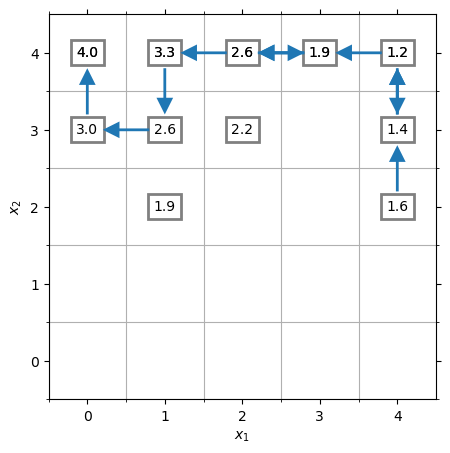

In [157]:
visualize_path(evaluated_xs, steps)

<br>

#### 시뮬레이티드 어닐링에서의 고려
- **온도 파라미터 $\tau$의 초깃값**
- **온도 파라미터를 어떻게 감소 시킬것인가?** (**냉각 스케쥴**)
- **온도 파라미터를 어떻게 수용 확률에 반영할 것인가?**

<br>

## 04.05. 유전 알고리즘 (Generic Algorithm)
- 생물이나 물리현상에 관찰된 구조로부터의 발견을 통하여 만들어진 계산 기법을 자연적 계산  (Natural Computing)
- 유전 알고리즘은 생물의 진화 과정에 도출된 메타휴리스틱
    
    유전 알고리즘은 솔루션을 생물 개체로 보고, 그 사이의 자연 도태의 형태를 재현한 것
    
    $\rightarrow$ **각 개체는 유전자를 표현한 것이며, 이 유전자가 교차나 돌연변이를 반복함으로써 환경에 적응한 개체를 나타내는 유전자 (최적 솔루션)을 발견**
    
<br>

<br>

### 유전 알고리즘의 절차
1. **무작위로 $N$개의 솔루션을 생성해 현세대의 솔루션 집합으로 정의**
2. **평가함수를 이용하여 현세대의 각 솔루션의 평갓값을 계산**
3. **평갓값이 큰 솔루션을 우선적으로 선택 (도태 조작)**
4. **선택된 솔루션에 교차 조작 및 돌연변이 조작을 가해 다음 세대의 솔루션 집합에 추가**
5. **종료 조건을 만족하면 종료, 만족하지 않으면 4의 다음 세대를 현세대로 하고 2로 복귀**

<br>

#### 도태조작
- **도태 조작 : 평갓값이 높은 것만 다음 세대에 남도록 선택하는 조작**
    - **평갓값이 높은 솔루션만 선택하는 엘리트 유저 전략, 평갓값에 따라 솔루션을 선택할 확률을 결정하는 룰렛 전략 등 다양하게 구현**
    
<br>

- **교차 조작 (Crossover) : 선택된 솔루션의 일부 유전자를 교환**
    - 우수한 솔루션의 특징을 공유함으로써 보다 우수한 솔루션을 만들어 내는 것을 목적으로 함
    
    <br>
    
    - 예) 솔루션이 7개의 비트열로 표시되고, 현세대의 솔루션 $ x=(0, 1,2, 3, 4, 5, 6, 7, 8, 9)$과 솔루션 $x = (5, 8, 9, 4, 2, 3, 5, 7, 5, 8)$이 도태조작을 통하여 선택된 상황
        - 교차조작에서는 선택된 2개 솔루션 비트열의 일부를 교환하여 새로운 솔루션을 생성
        
        - 교환할 비트열의 추출 방법은 교차조작 수행 시 무작위로 결정하는 것이 일반적
        - **교차율 : 현세대의 솔루션 중 교차조작을 실시할 솔루션 수의 비율. 최적화의 성능을 좌우하는 중요한 파라미터**

<img src='https://lh5.googleusercontent.com/DMB3WHRYIJW48wb7QTDBNbCUPCdUgrJqz-5DiSTqVU4My6TGVm8rhxiHzAv7fQrXBrwnaQHc_tgEW8B9aNch9HzYMIaA4wUBmpnYEQqILBgcYsd5GlvzJjzMrB88LwnxB77IqVuT' width='400'>

<br>

* **돌연변이 조작 (Mutation) : 솔루션에 무작위로 변화를 삽입 $\rightarrow$ 솔루션 집합이 다양성을 가지도록 하는 역할**
    - 무작위로 솔루션을 선택하고, 무작위로 선택된 요소를 바꿔 사용
    - **돌연변이율 : 돌연변이 조작을수행한 솔루션의 비율. 최적화 성능을 좌우하는 중요한 파라미터**
    
<img src = 'https://miro.medium.com/v2/resize:fit:494/1*lnagSG-eYoE-5WDAAwRtmA.png' width='300'>

<br>

### 유전 알고리즘을 이용한 비트 이미지 생성
- 아이덴티콘 (Identicon) : 해시값을 시각화한 것으로, 사용자 식별을 목적으로 이용되는 아이콘

<br>

- 무작위로 비트 이미지 출력 ($8\times 8 = 64$픽셀)
- 아이콘은 좌우 대칭이 되어야 하는 제약이 있으므로, 전체의 절반인 $32$개 픽셀이 결정되면 비트 이미지도 결정
    
    $\rightarrow$ 즉, 길이 32인 비트열에 대해 하나의 고유한 비트 이미지를 표현)

    $\rightarrow$ 이 비트열이 유전 알고리즘에서의 유전자 및 솔루션

<br>

#### 무작위로 10개의 솔루션을 생성 $N=10$ (1세대)

In [163]:
np.random.seed(0)
N = 10
size = 8
solutions = [np.random.randint(0, 2, size=size * size // 2) for _ in range(N)]

In [164]:
solutions

[array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0]),
 array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1]),
 array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1]),
 array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1]),
 array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 

<br>

#### 솔루션에 대한 이미지 시각화
- 길이 32인 비트열을 $8\times 4$의 2차원 배열로 변환 $\rightarrow$ 좌우 반전시킨 것을 옆으로 붙임

In [169]:
def represent(solution): return np.hstack((
    solution.reshape(size, size // 2),
    solution.reshape(size, size // 2)[:, ::-1]
    ))

In [170]:
represent(solutions[0])

array([[0, 1, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 1]])

- **1세대에 포함된 10개 비트열을 시각화**

In [172]:
def visualize(solutions):
    rows = 2
    cols = N // rows
    i=0
    for row in range(rows):
        for col in range(cols): 
            plt.subplot(rows, cols, i + 1) 
            plt.imshow(represent(solutions[i])) 
            plt.axis('off')
            plt.title(i)
            i += 1

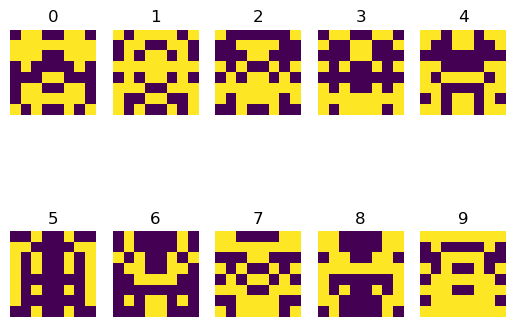

In [173]:
visualize(solutions)
plt.show() 

<br>

#### 교차조작
- 비트열의 길이에서 무작위로 교차할 점을 결정하고 교차

In [209]:
def crossover(sol1, sol2):
    thres = np.random.randint(0, size * size // 2) 
    new_solution = np.hstack((sol1[:thres], sol2[thres:])) 
    
    return new_solution

In [201]:
print('교차조작 결과: ', crossover(solutions[0], solutions[1]))

9
교차조작 결과:  [0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]


In [202]:
print(solutions[0][:9], ' + ', solutions[1][9:])

[0 1 1 0 1 1 1 1 1]  +  [1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]


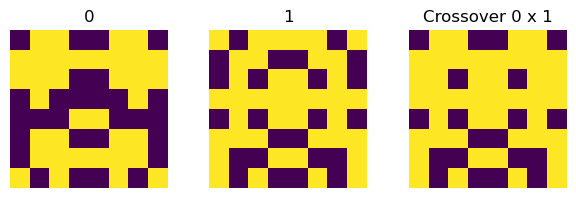

In [175]:
plt.subplot(1, 3, 1)
plt.imshow(represent(solutions[0]))
plt.title('0')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(represent(solutions[1]))
plt.title('1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(represent(crossover(solutions[0], solutions[1])))
plt.title('Crossover 0 x 1')
plt.axis('off')
plt.tight_layout(pad=3)

plt.show()  

<br>

#### 돌연변이 조작 (Mutation)
- 변이를 일으킬 위치를 랜덤으로 결정 $\rightarrow$ 

In [208]:
def mutation(solution):
    mut = np.random.randint(0, size * size // 2)
    
    new_solution = solution.copy()
    new_solution[mut] = (new_solution[mut] + 1) % 2
    
    return new_solution

In [200]:
print('돌연변이 결과 : ', mutation(solutions[0]))

31 번째 원소의 돌연변이 :  0  - > 1
교차조작 :  [0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1]


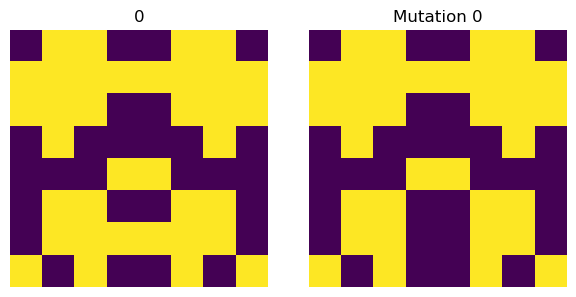

In [205]:
plt.subplot(1, 2, 1)
plt.imshow(represent(solutions[0]))
plt.title('0')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(represent(mutation(solutions[0])))
plt.title('Mutation 0')
plt.axis('off')
plt.tight_layout(pad=3)

plt.show()  

<br>

#### 2세대 출력
- 유전적인 조작을 종합하여 새로운 세대의 솔루션 집합을 출력

In [215]:
N = 10

In [213]:
def new_generation(parents, mut_n=3): 
    
    solutions = []
    
    # 부모개체에서 무작위로 쌍을 추출하여 교차조작
    for _ in range(N):
        [i, j] = np.random.choice(range(len(parents)), 2, replace=False)
        child = crossover(parents[i], parents[j])
        solutions.append(child)
    
    # mut_n 개의 솔루션에 대해 돌연변이 조작
    for i in range(mut_n):
        solutions[i] = mutation(solutions[i])
    
    return solutions

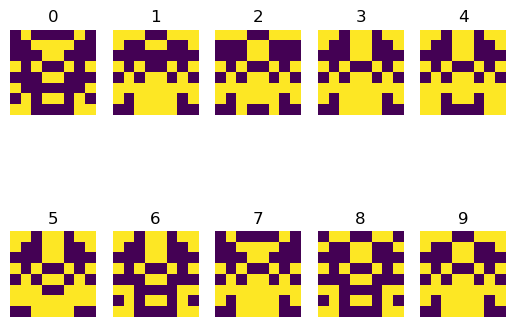

In [214]:
solutions = new_generation([solutions[2], solutions[3], solutions[4], solutions[9]])
visualize(solutions)
plt.show()  

<br>

#### 3세대 출력
- **2세대의 솔루션중 일부 솔루션들이 높은 평갓값을 받았다고 가정 (= 도태 조작)**

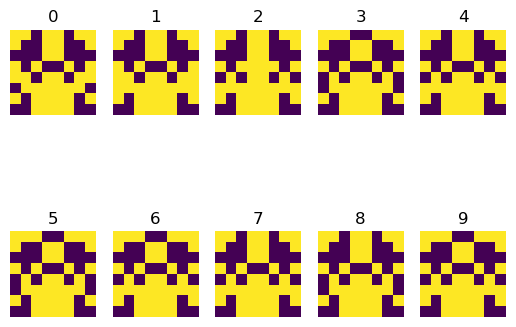

In [218]:
solutions = new_generation([solutions[2], solutions[3], solutions[9]])
visualize(solutions)
plt.show()

<br>

#### 4세대 출력

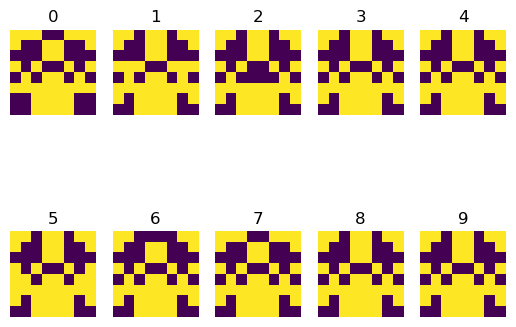

In [219]:
solutions = new_generation([solutions[1], solutions[4], solutions[7], solutions[9]])
visualize(solutions)
plt.show() 

<br>

#### 5세대 출력

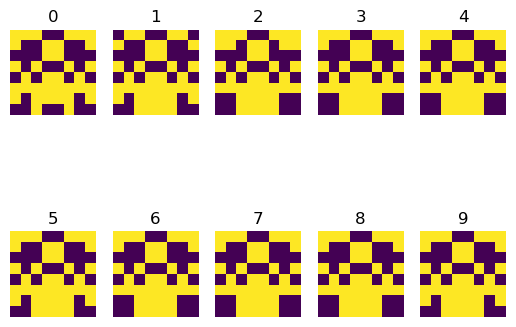

In [220]:
solutions = new_generation([solutions[0], solutions[7]])
visualize(solutions)
plt.show() 

<br>

## 04.06. 메타휴리스틱
- 메타휴리스틱이 잘 동작하기 위해서는 평가 함수가 근접 최적성의 원리 (Proximate Optimality Principal)을 만족해야 함
    - 근접 최적성의 원리 : '좋은 소룰션끼리 비슷한 특징을 가짐'
- **이 원리가 성립한다는 가정 하에 시뮬레이티드 어닐리의 근방 솔루션이나, 유전 알고리즘의 교차 및 돌연변이 조작으로 만들어진 차세대 솔루션의 평갓값이 높아진다고 기대할 수 있는 것**
    
    (주어진 최적화 문제가 이 원리를 만족했다는 보장은 없지만, 실험적으로 다루는 다양한 최적화 문제가 이 원리를 만족)
    
<br>

- 메타휴리스틱은 좋은 솔루션 주변에 탐색을 모으는 **집중화**와 탐색하지 않은 솔루션을 시험하는 **다양화**의 균형을 맞춰가며 탐색
- 시뮬레이티드 어닐리의 근방 솔루션을 탐색하는 것으로 집중화를 실현하고, 
    
    때때로 평갓값이 낮은 방향으로 솔루션을 업데이트함으로써 댜양화를 실현